is a guide for you but is not strict - you can use more cells or less. If you want to try other things then you can but it is not gauranteed to raise your score. What I want you to do is to do the things I ask for well and to explain them clearly. 

In [2]:
# Disable the warnings
import warnings
warnings.filterwarnings('ignore')

## Overview

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Data Preparation and Feature Selection](#2)
    * [3.1. Preparing the predicted variable](#2.1)    
    * [3.2. Feature Selection-Limit the Feature Space](#2.2)
        * [3.2.1.  Features elimination by significant missing values ](#2.2.1)
        * [3.2.2.  Features elimination based on the intutiveness](#2.2.2)
        * [3.2.3.  Features elimination based on the correlation](#2.2.3)   
* [4. Feature Engineering and Exploratory Analysis](#3)
    * [4.1 Feature Analysis and Exploration](#3.1)
        * [4.1.1. Analysing the categorical features](#3.1.1)
        * [4.1.2  Analysing the continuous features ](#3.1.2) 
    * [4.2.Encoding Categorical Data](#3.2)
    * [4.3.Sampling Data](#3.3)    
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train/Test Split](#4.1)
    * [5.2. Test Options and Evaluation Metrics](#4.2)
    * [5.3. Compare Models and Algorithms](#4.3)
* [6. Model Tuning and Grid Search](#5)  
* [7. Finalize the Model](#6)  
    * [7.1. Results on test dataset](#6.1)
    * [7.1. Variable Intuition/Feature Selection](#6.2) 
    * [7.3. Save model for later use](#6.3)


<a id='0'></a>
# 1. Problem Definition

This case study aims to analyze data for loans through 2007-2017Q3 from Lending Club available on Kaggle. Dataset contains over 887 thousand observations and 150 variables among which one is describing the loan status. The predicted variable is “Charge-Off ”. A charge-off is a debt that a creditor has given up trying to collect on after you’ve missed payments for several months. You want a model that can predict charge-off.

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

## 2.1. Load all the python packages you need here

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

<a id='1.2'></a>
## 2.2. Loading the Data

### Load the data in this step. This is in the form of a zipped csv file LoansData_sample.csv.gz - see how you load a zipped csv file in the pandas documentation. Use a utf-8 encoding. Call the dataframe "dataset"

In [4]:
dataset = pd.read_csv("LoansData_sample.csv.gz",encoding = "utf-8",index_col = 0,header = 0)

### Examine the properties of the data frame

In [5]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,37842129,NaN,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,37612354,NaN,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset.shape

(100000, 150)

<a id='2'></a>
## 3. Data Preparation and Feature Selection

<a id='2.1'></a>
## 3.1. Preparing the predicted variable


### The column to predict is loan_status. Look at the values it takes and their counts.

In [7]:
predictor = dataset["loan_status"]
predictor.value_counts() # show the number of each status

Fully Paid            69982
Charged Off           16156
Current               12726
Late (31-120 days)      730
In Grace Period         264
Late (16-30 days)       139
Default                   3
Name: loan_status, dtype: int64

### You need to try to learn differences in the features between completed loans that have been fully paid or charged off. Don't consider loans that are current, don't meet the credit policy, defaulted, or have a missing status. So only keep the loans with status "Fully Paid" or "Charged Off." Count the number of each.

In [8]:
p1 = predictor[predictor == 'Charged Off']
p2 = predictor[predictor == 'Fully Paid']
print(p1.value_counts())
print(p2.value_counts())

Charged Off    16156
Name: loan_status, dtype: int64
Fully Paid    69982
Name: loan_status, dtype: int64


In [9]:
d1 = dataset.loc[p1.index]
d2 = dataset.loc[p2.index]
dataset = pd.concat([d1,d2],axis=0)
dataset

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
8,36804663,NaN,23325.0,23325.0,23325.0,36 months,14.31,800.71,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
10,37701596,NaN,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
11,37800722,NaN,12975.0,12975.0,12975.0,36 months,17.86,468.17,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,20798747,NaN,26000.0,26000.0,26000.0,60 months,15.61,626.90,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
99994,21491171,NaN,15000.0,15000.0,14975.0,36 months,10.15,485.07,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
99995,22454240,NaN,8400.0,8400.0,8400.0,36 months,9.17,267.79,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
99996,11396920,NaN,10000.0,10000.0,10000.0,36 months,12.99,336.90,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dataset.loan_status

1        Charged Off
4        Charged Off
8        Charged Off
10       Charged Off
11       Charged Off
            ...     
99993     Fully Paid
99994     Fully Paid
99995     Fully Paid
99996     Fully Paid
99999     Fully Paid
Name: loan_status, Length: 86138, dtype: object

In [11]:
dataset.shape

(86138, 150)

### Is this an unbalanced dataset ?

In [12]:
dataset.loan_status.value_counts() 
# It's not a balanced dataset since these two labels have different numbers, we shall do some sampling work

Fully Paid     69982
Charged Off    16156
Name: loan_status, dtype: int64

### Set the labels to be 1 for Charged off else 0

In [13]:
t = {'Charged Off':1,"Fully Paid":0}
dataset["charged_off"] = dataset["loan_status"].map(t)

<a id='2.2'></a>
## 3.2. Feature Selection-Limit the Feature Space 

The full dataset has 150 features for each
loan. We’ll eliminate
features in following steps using three different approaches:
* Eliminate feature that have more than 30% missing values.
* Eliminate features that are unintuitive based on subjective judgement - I will give you these.
* Eliminate features with low correlation with the predicted variable

<a id='2.2.1'></a>
### 3.2.1.  Features elimination by significant missing values

### Calculating the percentage of missing data for each feature using isnull().mean():

In [14]:
pct_miss = dataset.isnull().mean()
pct_miss

id                       0.000000
member_id                1.000000
loan_amnt                0.000000
funded_amnt              0.000000
funded_amnt_inv          0.000000
                           ...   
settlement_date          0.985407
settlement_amount        0.985407
settlement_percentage    0.985407
settlement_term          0.985407
charged_off              0.000000
Length: 151, dtype: float64

### Drop the columns with more than 30% of missing data.

In [15]:
features = dataset.iloc[:,np.where(pct_miss>0.3)[0]].columns

In [16]:
dataset = dataset.drop(features,axis=1)

In [17]:
dataset.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,charged_off
1,36805548,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,...,0.0,0.0,179407.0,15030.0,13000.0,11325.0,N,Cash,N,1
4,37662224,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,Technical Specialist,...,0.0,0.0,82331.0,64426.0,4900.0,64031.0,N,Cash,N,1
8,36804663,23325.0,23325.0,23325.0,36 months,14.31,800.71,C,C4,Teacher,...,0.0,0.0,443889.0,79490.0,36000.0,78126.0,N,Cash,N,1
10,37701596,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Investment Consultant,...,0.0,0.0,24200.0,23723.0,21200.0,0.0,N,Cash,N,1
11,37800722,12975.0,12975.0,12975.0,36 months,17.86,468.17,D,D5,Sales,...,0.0,0.0,42943.0,17281.0,5500.0,27243.0,N,Cash,N,1


### How large is the remaining dataset ?

In [18]:
dataset.shape

(86138, 93)

<a id='2.2.2'></a>
### 3.2.2.  Features elimination based on the intutiveness

### In order to filter the features further I checked the description in the data dictionary and keep the features that are intuitive on the basis of subjective judgement. To do so I examine the LendingClub website and Data Dictionary to determine which features would have been available to potential investors. Here's the list of features I have decided to keep. Can you do the same.

In [19]:
keep_list = ['charged_off','funded_amnt','addr_state', 'annual_inc', 'application_type', 
             'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 
             'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 
             'installment', 'int_rate', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 
             'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 
             'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code',
             'last_pymnt_amnt','num_actv_rev_tl', 'mo_sin_rcnt_rev_tl_op','mo_sin_old_rev_tl_op',
             "bc_util","bc_open_to_buy","avg_cur_bal","acc_open_past_24mths" ] # first column_name?

### Drop all of the features except these ones from the dataset.

In [20]:
dataset = dataset[keep_list]

In [21]:
dataset.shape

(86138, 40)

In [22]:
dataset.head(5)

,charged_off,funded_amnt,addr_state,annual_inc,application_type,dti,earliest_cr_line,emp_length,emp_title,fico_range_high,...,verification_status,zip_code,last_pymnt_amnt,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
1,1,10400.0,CA,58000.0,Individual,14.92,Sep-1989,8 years,Truck Driver Delivery Personel,714.0,...,Not Verified,937xx,321.08,9.0,1.0,290.0,41.5,7599.0,9536.0,7.0
4,1,7650.0,AZ,50000.0,Individual,34.81,Aug-2002,< 1 year,Technical Specialist,689.0,...,Source Verified,850xx,17.70,4.0,8.0,148.0,93.2,332.0,5857.0,6.0
8,1,23325.0,WA,72000.0,Individual,27.03,Oct-1998,10+ years,Teacher,669.0,...,Source Verified,982xx,800.71,5.0,15.0,194.0,89.0,3977.0,39356.0,6.0
10,1,10000.0,MI,90000.0,Individual,8.44,Jul-2003,8 years,Investment Consultant,679.0,...,Verified,483xx,332.10,5.0,40.0,124.0,98.5,324.0,4745.0,0.0
11,1,12975.0,FL,60000.0,Individual,22.42,Jan-1999,10+ years,Sales,684.0,...,Source Verified,331xx,50.00,8.0,2.0,122.0,52.7,2604.0,1571.0,7.0


### How large is the remaining dataset ?

In [23]:
dataset.shape

(86138, 40)

<a id='2.2.3'></a>
### 3.2.3.  Features elimination based on the correlation

### Now remove all of the features with a correlation of under 3% with the  charge-off label. List the names of the features you are removing.

In [24]:
cor = dataset.corr()
low_correlated = abs(cor['charged_off'])<0.03
cor['charged_off'][low_correlated]

id                      0.002221
pub_rec                 0.016023
pub_rec_bankruptcies    0.015815
revol_bal              -0.021714
total_acc               0.005804
Name: charged_off, dtype: float64

In [25]:
name = cor['charged_off'][low_correlated].index
name

Index(['id', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'total_acc'], dtype='object')

In [26]:
dataset = dataset.drop(name,axis=1)

In [27]:
dataset.head()

,charged_off,funded_amnt,addr_state,annual_inc,application_type,dti,earliest_cr_line,emp_length,emp_title,fico_range_high,...,verification_status,zip_code,last_pymnt_amnt,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
1,1,10400.0,CA,58000.0,Individual,14.92,Sep-1989,8 years,Truck Driver Delivery Personel,714.0,...,Not Verified,937xx,321.08,9.0,1.0,290.0,41.5,7599.0,9536.0,7.0
4,1,7650.0,AZ,50000.0,Individual,34.81,Aug-2002,< 1 year,Technical Specialist,689.0,...,Source Verified,850xx,17.70,4.0,8.0,148.0,93.2,332.0,5857.0,6.0
8,1,23325.0,WA,72000.0,Individual,27.03,Oct-1998,10+ years,Teacher,669.0,...,Source Verified,982xx,800.71,5.0,15.0,194.0,89.0,3977.0,39356.0,6.0
10,1,10000.0,MI,90000.0,Individual,8.44,Jul-2003,8 years,Investment Consultant,679.0,...,Verified,483xx,332.10,5.0,40.0,124.0,98.5,324.0,4745.0,0.0
11,1,12975.0,FL,60000.0,Individual,22.42,Jan-1999,10+ years,Sales,684.0,...,Source Verified,331xx,50.00,8.0,2.0,122.0,52.7,2604.0,1571.0,7.0


### How large is the resulting dataset ?

In [28]:
dataset.shape

(86138, 35)

<a id='3'></a>
# 4. Feature Engineering and Exploratory Analysis

### Examine the properties of the remaining features.

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86138 entries, 1 to 99999
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   charged_off            86138 non-null  int64  
 1   funded_amnt            86138 non-null  float64
 2   addr_state             86138 non-null  object 
 3   annual_inc             86138 non-null  float64
 4   application_type       86138 non-null  object 
 5   dti                    86138 non-null  float64
 6   earliest_cr_line       86138 non-null  object 
 7   emp_length             81421 non-null  object 
 8   emp_title              81416 non-null  object 
 9   fico_range_high        86138 non-null  float64
 10  fico_range_low         86138 non-null  float64
 11  grade                  86138 non-null  object 
 12  home_ownership         86138 non-null  object 
 13  initial_list_status    86138 non-null  object 
 14  installment            86138 non-null  float64
 15  in

In [30]:
def find_missing(x):
    missing_value_features = []
    for i in range(dataset.shape[1]):
        x = dataset.iloc[:,i].count()
        if x!=dataset.shape[0]:
            missing_value_features.append(dataset.columns[i])
    return missing_value_features

In [31]:
find_missing(dataset)

['emp_length', 'emp_title', 'revol_util', 'bc_util', 'bc_open_to_buy']

<a id='3.1'></a>
## 4.1 Feature Analysis and Exploration

<a id='3.1.1'></a>
### 4.1.1. Analysing the categorical features 

### List the categorical features and take a decision on what to do with them - drop them or process them. Explain your decisions.

In [32]:
def find_cat(x):
    cat = x.iloc[:,np.where(x.dtypes==object)[0]]
    return cat

In [33]:
cat_features = find_cat(dataset)

In [34]:
cat_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86138 entries, 1 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   addr_state           86138 non-null  object
 1   application_type     86138 non-null  object
 2   earliest_cr_line     86138 non-null  object
 3   emp_length           81421 non-null  object
 4   emp_title            81416 non-null  object
 5   grade                86138 non-null  object
 6   home_ownership       86138 non-null  object
 7   initial_list_status  86138 non-null  object
 8   loan_status          86138 non-null  object
 9   purpose              86138 non-null  object
 10  sub_grade            86138 non-null  object
 11  term                 86138 non-null  object
 12  title                86138 non-null  object
 13  verification_status  86138 non-null  object
 14  zip_code             86138 non-null  object
dtypes: object(15)
memory usage: 10.5+ MB


In [35]:
cat_features.head()

,addr_state,application_type,earliest_cr_line,emp_length,emp_title,grade,home_ownership,initial_list_status,loan_status,purpose,sub_grade,term,title,verification_status,zip_code
1,CA,Individual,Sep-1989,8 years,Truck Driver Delivery Personel,A,MORTGAGE,w,Charged Off,credit_card,A3,36 months,Credit card refinancing,Not Verified,937xx
4,AZ,Individual,Aug-2002,< 1 year,Technical Specialist,C,RENT,f,Charged Off,debt_consolidation,C3,36 months,Debt consolidation,Source Verified,850xx
8,WA,Individual,Oct-1998,10+ years,Teacher,C,RENT,f,Charged Off,credit_card,C4,36 months,Credit card refinancing,Source Verified,982xx
10,MI,Individual,Jul-2003,8 years,Investment Consultant,B,RENT,f,Charged Off,debt_consolidation,B5,36 months,Debt consolidation,Verified,483xx
11,FL,Individual,Jan-1999,10+ years,Sales,D,RENT,f,Charged Off,house,D5,36 months,Home buying,Source Verified,331xx


In [36]:
# Because  earliest_cr_line, zip code and emp_title  seems will not influence the loan status, therefore decide to drop them
drop = ['earliest_cr_line', 'zip_code','emp_title','title']
dataset = dataset.drop(drop,axis=1)

In [37]:
dataset.head()

,charged_off,funded_amnt,addr_state,annual_inc,application_type,dti,emp_length,fico_range_high,fico_range_low,grade,...,term,verification_status,last_pymnt_amnt,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
1,1,10400.0,CA,58000.0,Individual,14.92,8 years,714.0,710.0,A,...,36 months,Not Verified,321.08,9.0,1.0,290.0,41.5,7599.0,9536.0,7.0
4,1,7650.0,AZ,50000.0,Individual,34.81,< 1 year,689.0,685.0,C,...,36 months,Source Verified,17.70,4.0,8.0,148.0,93.2,332.0,5857.0,6.0
8,1,23325.0,WA,72000.0,Individual,27.03,10+ years,669.0,665.0,C,...,36 months,Source Verified,800.71,5.0,15.0,194.0,89.0,3977.0,39356.0,6.0
10,1,10000.0,MI,90000.0,Individual,8.44,8 years,679.0,675.0,B,...,36 months,Verified,332.10,5.0,40.0,124.0,98.5,324.0,4745.0,0.0
11,1,12975.0,FL,60000.0,Individual,22.42,10+ years,684.0,680.0,D,...,36 months,Source Verified,50.00,8.0,2.0,122.0,52.7,2604.0,1571.0,7.0


### Convert Term to a numerical feature

In [38]:
def cov(t):
    i=0
    m={}
    test = t.unique()
    while i<test.shape[0]:
        c = np.where(test == test[i])[0][0]
        m1 = {test[i]:c}
        m.update(m1)
        i+=1
    return m

In [39]:
m = cov(dataset.term)

In [40]:
m

{' 36 months': 0, ' 60 months': 1}

In [41]:
dataset['term'] = dataset['term'].map(m)

m0={'8 years':0,'< 1 year':1,'10+ years':2,'4 years':3,'9 years':4,'nan':5, '2 years':6,'3 years':7,'5 years':8,
   '1 year':9,'7 years':10,'6 years':11}
object_data.iloc[:,0] = object_data.iloc[:,0].map(m0)

m1=cov(1)
m2=cov(2)
m3=cov(3)
m4=cov(4)
m5=cov(5)
m6=cov(6)
m7=cov(7)
m8=cov(8)
m9=cov(9)

object_data.iloc[:,1]=object_data.iloc[:,1].map(m1)
object_data.iloc[:,2]=object_data.iloc[:,2].map(m2)
object_data.iloc[:,3]=object_data.iloc[:,3].map(m3)
object_data.iloc[:,4]=object_data.iloc[:,4].map(m4)
object_data.iloc[:,5]=object_data.iloc[:,5].map(m5)
object_data.iloc[:,6]=object_data.iloc[:,6].map(m6)
object_data.iloc[:,7]=object_data.iloc[:,7].map(m7)
object_data.iloc[:,8]=object_data.iloc[:,8].map(m8)
object_data.iloc[:,9]=object_data.iloc[:,9].map(m9)

object_data

c = object_data.columns
dataset = dataset.drop(c,axis=1)
dataset.shape# without categorical features

dataset = pd.concat([dataset,object_data],axis=1)
dataset.shape

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86138 entries, 1 to 99999
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   charged_off            86138 non-null  int64  
 1   funded_amnt            86138 non-null  float64
 2   addr_state             86138 non-null  object 
 3   annual_inc             86138 non-null  float64
 4   application_type       86138 non-null  object 
 5   dti                    86138 non-null  float64
 6   emp_length             81421 non-null  object 
 7   fico_range_high        86138 non-null  float64
 8   fico_range_low         86138 non-null  float64
 9   grade                  86138 non-null  object 
 10  home_ownership         86138 non-null  object 
 11  initial_list_status    86138 non-null  object 
 12  installment            86138 non-null  float64
 13  int_rate               86138 non-null  float64
 14  loan_amnt              86138 non-null  float64
 15  lo

### Decide if you want to do anything to emp_length

In [43]:
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80460 entries, 1 to 99999
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   charged_off            80460 non-null  int64  
 1   funded_amnt            80460 non-null  float64
 2   addr_state             80460 non-null  object 
 3   annual_inc             80460 non-null  float64
 4   application_type       80460 non-null  object 
 5   dti                    80460 non-null  float64
 6   emp_length             80460 non-null  object 
 7   fico_range_high        80460 non-null  float64
 8   fico_range_low         80460 non-null  float64
 9   grade                  80460 non-null  object 
 10  home_ownership         80460 non-null  object 
 11  initial_list_status    80460 non-null  object 
 12  installment            80460 non-null  float64
 13  int_rate               80460 non-null  float64
 14  loan_amnt              80460 non-null  float64
 15  lo

In [44]:
m = cov(dataset.emp_length) # since too many categories here, so decide to devide emp_length into three groups
m

{'8 years': 0,
 '< 1 year': 1,
 '10+ years': 2,
 '9 years': 3,
 '4 years': 4,
 '2 years': 5,
 '3 years': 6,
 '5 years': 7,
 '1 year': 8,
 '7 years': 9,
 '6 years': 10}

In [45]:
dataset.emp_length = dataset.emp_length.map(m)

In [46]:
c1 = (1,4,5,6,8) # less than 5 years
c2 = (0,3,7,9,10) # between 5 years to 10 years
c3 = (2) # above 10 years

In [47]:
a1 = np.where(dataset.emp_length==1)[0]
a2 = np.where(dataset.emp_length==4)[0]
a3 = np.where(dataset.emp_length==5)[0]
a4 = np.where(dataset.emp_length==6)[0]
a5 = np.where(dataset.emp_length==8)[0]
a = np.concatenate([a1,a2,a3,a4,a5])

b1 = np.where(dataset.emp_length==0)[0]
b2 = np.where(dataset.emp_length==3)[0]
b3 = np.where(dataset.emp_length==7)[0]
b4 = np.where(dataset.emp_length==9)[0]
b5 = np.where(dataset.emp_length==10)[0]
b = np.concatenate([b1,b2,b3,b4,b5])

c=np.where(dataset.emp_length==2)[0]

In [48]:
dataset.emp_length.iloc[a] = 0 # less than 5 years
dataset.emp_length.iloc[b] = 1 # between 5 years to 10 years
dataset.emp_length.iloc[c] = 2 # above 10 years

In [49]:
dataset.emp_length.value_counts()

0    31934
2    27796
1    20730
Name: emp_length, dtype: int64

### Is sub_grade worth keeping ?

In [50]:
dataset['sub_grade'].unique() # sub_grade is not worthy to keep, since it has too many categories

array(['A3', 'C3', 'C4', 'B5', 'D5', 'D3', 'C5', 'D4', 'C2', 'G2', 'C1',
       'G1', 'F3', 'D1', 'F2', 'B3', 'E2', 'G3', 'B2', 'F1', 'B4', 'E1',
       'E5', 'E4', 'B1', 'D2', 'F4', 'A2', 'A4', 'A5', 'F5', 'E3', 'A1',
       'G4', 'G5'], dtype=object)

In [51]:
dataset = dataset.drop('sub_grade',axis=1)

In [52]:
dataset.shape

(80460, 30)

<a id='3.1.2'></a>
### 4.1.2. Analysing the continuous features 

### Do you want to do anything to Annual Income ?

#### Feature : Annual Income

In [53]:
dataset.describe()['annual_inc'] # split them into 4 part according to quartile range

count    8.046000e+04
mean     7.538587e+04
std      6.004028e+04
min      4.000000e+03
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      7.500000e+06
Name: annual_inc, dtype: float64

In [54]:
col= 'annual_inc'
conditions  = [dataset[col] <= 4.500000e+4,
               (dataset[col] > 4.500000e+4) & (dataset[col] <= 6.500000e+04),
                (dataset[col] > 6.500000e+04) & (dataset[col] <= 9.000000e+04),
                (dataset[col] > 9.000000e+04) & (dataset[col] <= 7.500000e+06)]
choices     = [ 0, 1, 2,3 ] # split them into 4 part according to quartile range
dataset['annual_inc'] = np.select(conditions, choices, default=np.nan)

In [55]:
dataset.annual_inc

1        1.0
4        1.0
8        2.0
10       2.0
11       1.0
        ... 
99993    2.0
99994    2.0
99995    3.0
99996    1.0
99999    1.0
Name: annual_inc, Length: 80460, dtype: float64

### How do you want to treat the two FICO scores ?

In [56]:
dataset[['fico_range_high','fico_range_low']]

,fico_range_high,fico_range_low
1,714.0,710.0
4,689.0,685.0
8,669.0,665.0
10,679.0,675.0
11,684.0,680.0
...,...,...
99993,704.0,700.0
99994,704.0,700.0
99995,709.0,705.0
99996,694.0,690.0


In [57]:
dataset[['fico_range_high','fico_range_low']].corr() # perfect correlated with each other

,fico_range_high,fico_range_low
fico_range_high,1.0,1.0
fico_range_low,1.0,1.0


In [58]:
dataset[['fico_range_high','fico_range_low']].value_counts() # seems same measurement just with tiny difference roughly 4 scores

fico_range_high  fico_range_low
664.0            660.0             8362
669.0            665.0             7851
674.0            670.0             7656
679.0            675.0             6703
684.0            680.0             6347
689.0            685.0             5722
694.0            690.0             5395
699.0            695.0             4871
704.0            700.0             4138
709.0            705.0             3732
714.0            710.0             3222
719.0            715.0             2825
724.0            720.0             2325
729.0            725.0             1853
734.0            730.0             1607
739.0            735.0             1234
744.0            740.0             1026
749.0            745.0              809
754.0            750.0              709
759.0            755.0              633
764.0            760.0              531
769.0            765.0              501
779.0            775.0              376
774.0            770.0              357
784.0   

In [59]:
dataset = dataset.drop('fico_range_high',axis=1)
dataset.shape # drop one of them

(80460, 29)

<a id='3.2'></a>
## 4.2. Encoding Categorical Data

### Decide how to handle the categorical data in columns ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status', 'application_type']

### You may wish to use a LabelEncoder


In [60]:
dataset.head()

,charged_off,funded_amnt,addr_state,annual_inc,application_type,dti,emp_length,fico_range_low,grade,home_ownership,...,term,verification_status,last_pymnt_amnt,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
1,1,10400.0,CA,1.0,Individual,14.92,1,710.0,A,MORTGAGE,...,0,Not Verified,321.08,9.0,1.0,290.0,41.5,7599.0,9536.0,7.0
4,1,7650.0,AZ,1.0,Individual,34.81,0,685.0,C,RENT,...,0,Source Verified,17.70,4.0,8.0,148.0,93.2,332.0,5857.0,6.0
8,1,23325.0,WA,2.0,Individual,27.03,2,665.0,C,RENT,...,0,Source Verified,800.71,5.0,15.0,194.0,89.0,3977.0,39356.0,6.0
10,1,10000.0,MI,2.0,Individual,8.44,1,675.0,B,RENT,...,0,Verified,332.10,5.0,40.0,124.0,98.5,324.0,4745.0,0.0
11,1,12975.0,FL,1.0,Individual,22.42,2,680.0,D,RENT,...,0,Source Verified,50.00,8.0,2.0,122.0,52.7,2604.0,1571.0,7.0


In [61]:
col = ['grade', 'home_ownership', 'verification_status', 'purpose',
        'addr_state', 'initial_list_status', 'application_type']

In [62]:
df = dataset[col]
df

,grade,home_ownership,verification_status,purpose,addr_state,initial_list_status,application_type
1,A,MORTGAGE,Not Verified,credit_card,CA,w,Individual
4,C,RENT,Source Verified,debt_consolidation,AZ,f,Individual
8,C,RENT,Source Verified,credit_card,WA,f,Individual
10,B,RENT,Verified,debt_consolidation,MI,f,Individual
11,D,RENT,Source Verified,house,FL,f,Individual
...,...,...,...,...,...,...,...
99993,D,MORTGAGE,Source Verified,debt_consolidation,MN,w,Individual
99994,B,MORTGAGE,Not Verified,debt_consolidation,AR,f,Individual
99995,B,MORTGAGE,Source Verified,debt_consolidation,IL,w,Individual
99996,C,RENT,Not Verified,debt_consolidation,NM,f,Individual


In [63]:
le = preprocessing.LabelEncoder()

In [64]:
LE = df.apply(le.fit_transform)
LE

,grade,home_ownership,verification_status,purpose,addr_state,initial_list_status,application_type
1,0,1,0,1,4,1,0
4,2,3,1,2,3,0,0
8,2,3,1,1,42,0,0
10,1,3,2,2,19,0,0
11,3,3,1,4,9,0,0
...,...,...,...,...,...,...,...
99993,3,1,1,2,20,1,0
99994,1,1,0,2,2,0,0
99995,1,1,1,2,12,1,0
99996,2,3,0,2,27,0,0


In [65]:
dataset = dataset.drop(df.columns,axis=1)

In [66]:
dataset = pd.concat([dataset,LE],axis=1)

<a id='3.4'></a>
## 4.3. Sampling Data

### To create a balanced dataset, draw 5500 rows at random from each of the two classes and combine them into a new dataframe.

In [67]:
dataset.charged_off.value_counts()

0    65637
1    14823
Name: charged_off, dtype: int64

In [68]:
sample1 = dataset.iloc[np.where(dataset.charged_off==1)[0]].sample(n=5500)
sample2 = dataset.iloc[np.where(dataset.charged_off==0)[0]].sample(n=5500)

In [69]:
df = pd.concat([sample1,sample2],axis=0)
df.shape

(11000, 29)

### Choose a method to handle any NAs that may be in a column.

In [70]:
df.isnull().any()

charged_off              False
funded_amnt              False
annual_inc               False
dti                      False
emp_length               False
fico_range_low           False
installment              False
int_rate                 False
loan_amnt                False
loan_status              False
mort_acc                 False
open_acc                 False
revol_util               False
term                     False
last_pymnt_amnt          False
num_actv_rev_tl          False
mo_sin_rcnt_rev_tl_op    False
mo_sin_old_rev_tl_op     False
bc_util                  False
bc_open_to_buy           False
avg_cur_bal              False
acc_open_past_24mths     False
grade                    False
home_ownership           False
verification_status      False
purpose                  False
addr_state               False
initial_list_status      False
application_type         False
dtype: bool

In [71]:
# didn't find missing value here, it has been handled above

In [72]:
df = df.drop('loan_status',axis=1) # since loan_status has been transferred to charged_off features in numerical way, therefore drop it

<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split

### Use an 80:20 split

In [73]:
y = df['charged_off']
X = df.drop('charged_off',axis=1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id='4.2'></a>
## 5.2. Test Options and Evaluation Metrics


### Use K-Folds cross validation with 10 folds and 'roc-auc' as your score.

In [76]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc
from sklearn import model_selection
from sklearn.metrics import classification_report
kf = KFold(n_splits=10,random_state=42,shuffle=True)

<a id='4.3'></a>
## 5.3. Compare Models and Algorithms

### Use a wide range of classification models. I have added them below to a Python list.

In [78]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# Neural Network
models.append(('NN', MLPClassifier()))
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))

### K-folds cross validation

In [79]:
models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('DT', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('NN', MLPClassifier()),
 ('AB', AdaBoostClassifier()),
 ('RF', RandomForestClassifier())]

In [80]:
scores = []
names = []
for name,model in models:
    crossval_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=kf)
    scores.append(crossval_scores)
    names.append(name)
    
results = pd.DataFrame(scores,index = names).T
results

,LR,KNN,DT,NB,NN,AB,RF
0,0.884611,0.815073,0.791956,0.891746,0.852363,0.923725,0.933834
1,0.897603,0.810704,0.815106,0.892158,0.894147,0.937588,0.931532
2,0.900475,0.827392,0.816806,0.899927,0.883291,0.932053,0.934567
3,0.893919,0.805191,0.815534,0.895310,0.873788,0.943644,0.943980
4,0.910883,0.827150,0.805694,0.905836,0.891306,0.943256,0.940607
5,0.898680,0.811869,0.798993,0.894759,0.873108,0.932047,0.927624
6,0.911174,0.823186,0.817910,0.895888,0.915499,0.937572,0.941625
7,0.886962,0.816602,0.800056,0.905172,0.898863,0.932808,0.941406
8,0.897476,0.814177,0.803365,0.908074,0.883650,0.941179,0.940396
9,0.894514,0.814041,0.811110,0.894524,0.871061,0.930808,0.933487


### Plot a model comparison using a BoxPlot to capture the range of values coming from the K Folds for each model

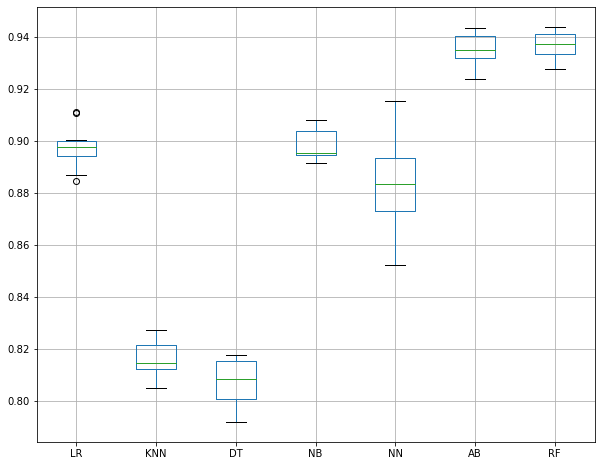

In [81]:
results.boxplot(figsize=(10,8));

<a id='5'></a>
# 6. Model Tuning and Grid Search

### Choose the best model and do some hyperparameter tuning by looping over the hyper parameters of the model to fine-tune the model. 

In [82]:
from sklearn.model_selection import RandomizedSearchCV # Use RandomizedSearchCV for hyperparameter tuning
best_model = RandomForestClassifier()

In [83]:
# After reading the documentation of RandomForest, find there are 4 hyperparameters are important
# namely n_estimators,max_depth,min_samples_split, min_samples_leaf
# set some initial starting value range for each hyperparameters
n_estimators = [int(x) for x in np.linspace(100,1000,num=10)]
max_depth=[int(x) for x in np.linspace(10,110,10)]
min_samples_split=[int(x) for x in np.linspace(1,10,10)]
min_samples_leaf=[int(x) for x in np.linspace(1,10,10)]

In [84]:
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [85]:
best_model_random = RandomizedSearchCV(estimator = best_model, param_distributions = random_grid, 
                                       n_iter = 100, cv = 2, random_state=42, n_jobs = -1)

In [86]:
best_model_random.fit(X_train,y_train)

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 21, 32, 43, 54, 65,
                                                      76, 87, 98, 110],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42)

In [87]:
best_model_random.best_params_ # this is the best hyperparameters after tuning

{'n_estimators': 400,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_depth': 43}

<a id='6'></a>
# 7. Finalise the Model

### Finalize Model with best parameters found during tuning step.

In [88]:
final_model = RandomForestClassifier(n_estimators= 700,min_samples_split=3,min_samples_leaf=3,max_depth=98)

<a id='6.1'></a>
## 7.1. Results on the Test Dataset

### Calculate the fine-tuned model results on the test dataset. Calculate accuracy, confusion matrix, the classification report.

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [90]:
final_model.fit(X_train,y_train)
y_pred = pd.Series(final_model.predict(X_test))

In [91]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8545454545454545

In [92]:
confusion_matrix(y_test,y_pred)

array([[883, 209],
       [111, 997]])

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1092
           1       0.83      0.90      0.86      1108

    accuracy                           0.85      2200
   macro avg       0.86      0.85      0.85      2200
weighted avg       0.86      0.85      0.85      2200



### Calculate the ROC curve for the model

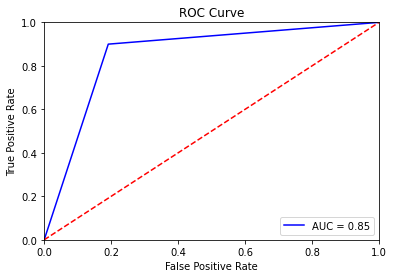

In [94]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f' % roc_auc)
plt.title("ROC Curve")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

<a id='6.2'></a>
## 7.2. Variable Intuition/Feature Importance
Looking at the details above GBM might be worthy of further study.
Let us look into the Feature Importance of the GBM model

### Examine the importance of each of the model features. Some models may have a features_importances property. For others you may need to loop over features and exclude/include them to determine their impact on the score.

In [95]:
importance = pd.Series(final_model.feature_importances_,index=X_test.columns)
importance

funded_amnt              0.020470
annual_inc               0.007051
dti                      0.030772
emp_length               0.005603
fico_range_low           0.021504
installment              0.026560
int_rate                 0.066282
loan_amnt                0.020846
mort_acc                 0.008951
open_acc                 0.014972
revol_util               0.022230
term                     0.042758
last_pymnt_amnt          0.478557
num_actv_rev_tl          0.014849
mo_sin_rcnt_rev_tl_op    0.018346
mo_sin_old_rev_tl_op     0.024096
bc_util                  0.021967
bc_open_to_buy           0.023425
avg_cur_bal              0.028287
acc_open_past_24mths     0.018627
grade                    0.042622
home_ownership           0.005451
verification_status      0.008193
purpose                  0.006405
addr_state               0.017455
initial_list_status      0.003721
application_type         0.000000
dtype: float64

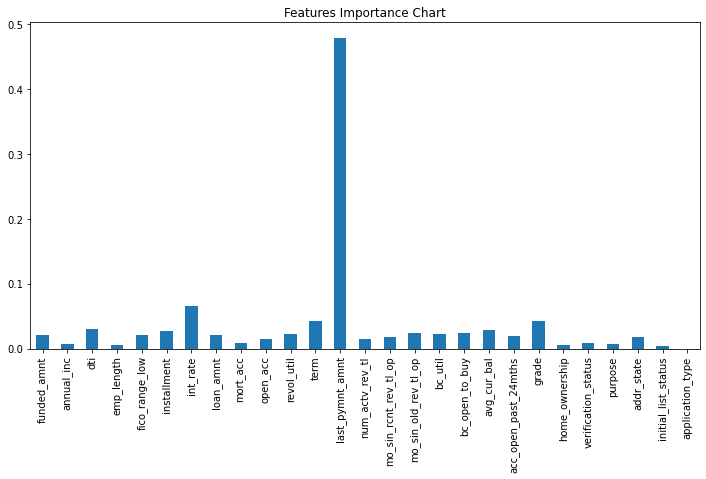

In [96]:
importance.plot.bar(figsize=(12,6)).set_title("Features Importance Chart");

In [97]:
top_5_features = importance.sort_values(ascending=False).head(5)
top_5_features

last_pymnt_amnt    0.478557
int_rate           0.066282
term               0.042758
grade              0.042622
dti                0.030772
dtype: float64

### Conclusion

### Write a summary of what you have found.

In [ ]:
''' To make prediction of whether a debt of a specific client will be charged off, 
the best model will be Random_forest(at least according to this coursework) and in addition,
the 5 most efficient features to predict are 'last_pymnt_amnt', 'int_rate', 'grade', 'term', 'dti'.
Also, in this coursework, it was not absolutely followed the instruction step by step, even all tasks
have been finished but the order maybe slighly different since we think it might be good as what we did
'''